# Question 1

Import packages, load data and instantiate scaler and PCA

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

q1_data = pd.read_csv("PADL-Q1.csv")
scaler = StandardScaler()
pca = PCA(n_components=5)

Apply PCA to scaled data

In [6]:
q1_data_scaled = scaler.fit_transform(q1_data)
q1_pcs = pca.fit_transform(q1_data_scaled)

array([[ 6.16580952e-01, -7.09138518e-01, -1.00167431e-01,
         2.44535762e-01, -7.85673967e-01],
       [ 2.22944660e+00,  1.44951197e-01,  1.01126055e+00,
        -1.02505875e+00, -5.30342068e-01],
       [ 1.28725304e+00, -1.77014769e-01, -8.80925689e-01,
        -1.81847989e+00, -3.08211149e-02],
       [ 1.05897151e+00,  3.26447557e-01,  4.58336738e-01,
         5.51786736e-01, -4.62732662e-01],
       [ 1.40761144e+00, -1.53340339e+00,  7.07612466e-01,
        -1.05946377e-01, -6.01917897e-01],
       [-1.22108060e-01,  6.80928734e-01,  1.29288448e+00,
         5.85665057e-01, -2.20051961e-01],
       [ 7.28119076e-01,  1.87710079e-01,  9.53755091e-01,
        -9.44089663e-01,  4.62377306e-01],
       [-8.88299994e-01, -7.03491090e-01,  5.61499493e-01,
         3.98401842e-01, -4.17781452e-01],
       [ 6.27981146e-01, -1.80320146e+00,  6.49128602e-01,
         3.84206643e-01, -9.71100630e-01],
       [ 1.36468230e+00,  5.30141699e-01, -9.33528319e-01,
        -4.55762640e-01

Check the minimum number of dimensions required to minimize loss of information

In [3]:
total_variance = sum(q1_pcs.var(axis=0))
for n_comp in range(1, q1_pcs.shape[1]):
    first_n_comp_variance = (
        sum(q1_pcs[:, 0:n_comp].var(axis=0)) / total_variance
    ) * 100
    print(
        f"The first {n_comp} principal components correspond to {first_n_comp_variance.round(2)}% of the total variance"
    )

The first 1 principal components correspond to 40.32% of the total variance
The first 2 principal components correspond to 70.24% of the total variance
The first 3 principal components correspond to 81.51% of the total variance
The first 4 principal components correspond to 91.95% of the total variance


Reducing the number of dimensions to four allows for a relatively small loss of information - the 4 components correspond to around 92 percent of the total variance.

In [8]:
pca_min_dims = PCA(n_components=4)
q1_pcs_min_dimensions = pca_min_dims.fit_transform(q1_data_scaled)
components = pca_min_dims.components_
components

array([[-0.55608777,  0.16605693, -0.55968369,  0.2074285 , -0.55400277],
       [-0.07616798, -0.68491569, -0.21946827, -0.67209755, -0.15876868],
       [-0.58290436,  0.2674771 , -0.13665832, -0.32308723,  0.68236182],
       [ 0.56104011,  0.48673801, -0.55197578, -0.37899935, -0.00152482]])

# Question 2

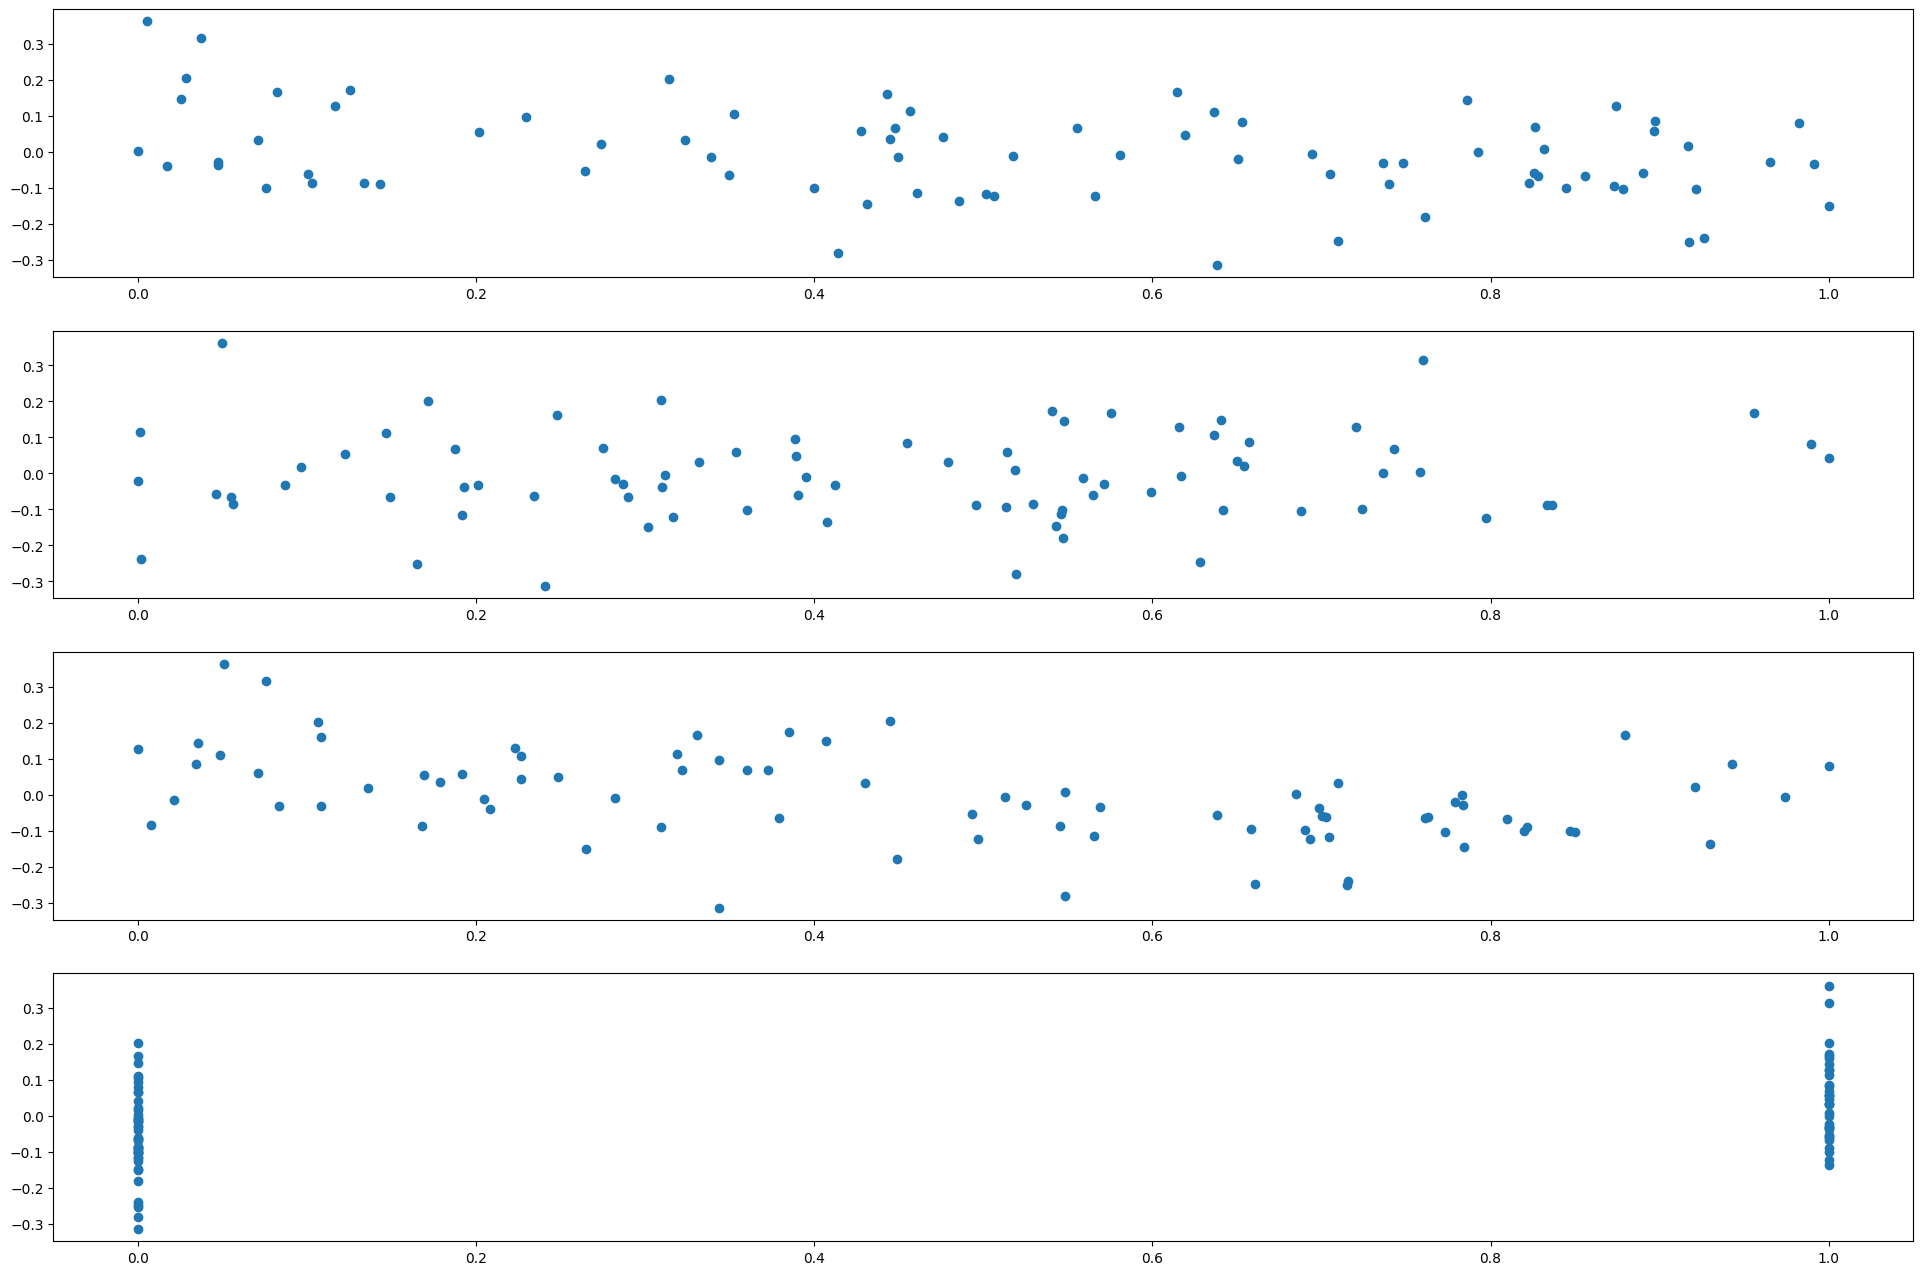

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

q2_scaler = MinMaxScaler()
q2_data = pd.read_csv("PADL-Q2-train.csv")
q2_data.head()
q2_data_X, q2_data_y = q2_data.drop(columns=["out"]), q2_data["out"]
q2_data_X_scaled = q2_scaler.fit_transform(q2_data_X)
fig, ax = plt.subplots(4, 1, figsize=(24, 16))
for i in range(q2_data_X_scaled.shape[1]):
    ax[i].scatter(q2_data_X_scaled[:, i], q2_data_y)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    q2_data_X, q2_data_y, train_size=0.8
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((64, 4), (64,), (16, 4), (16,))

In [127]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

num_poly_features = [2, 3, 4, 5]
regularisations = [
    RidgeCV(fit_intercept=True),
    LassoCV(fit_intercept=True),
    Ridge(fit_intercept=True),
    Lasso(fit_intercept=True),
]

for degree in num_poly_features:
    model = make_pipeline(
        StandardScaler(), PolynomialFeatures(degree), LassoCV(fit_intercept=True)
    )
    model.fit(X_train, y_train)
    print(mean_squared_error(y_test, model.predict(X_test)))

0.021712302716367485
0.028216032656839647
0.026024535739163197
0.05585691226597662


# Question 3

In [1]:
L = ["gold", "diamond", "robbery", "bank", "police"]

Capture all triplets matching the pattern 'X and Y'

In [67]:
import re

pattern = re.compile(
    r"(?=("  # We need a lookahead because triplets can overlap (e.g. 'X and Y and Z'), normal regex will not capture the second triplet
    r"(?<![a-zA-Z-])"  # Negative lookbehind, ensuring that each triplet starts at the beginning of the first word.
    r"[a-zA-z]+"  # At least one letter (so we don't capture triplets like ', and then')
    r"[\S]*"  # Any number of further letters and/or punctuation except whitespace
    r"\s+"  # At least one whitespace character (newline, tab, space, etc)
    r"[Aa]nd"  # 'And' or 'and'
    r"\s+"  # At least one whitespace character
    r"[a-zA-z]+"  # At least one letter
    r"[\S]*"  # Any number of further letters and/or punctuation
    r"))"
)
print(pattern.findall("testing and trialling"))  # Can capture a single triplet
print(pattern.findall("X and Y and Z"))  # Can capture overlapping triplets
print(pattern.findall("tight-fitting and sleek"))  # Can capture hyphenated words
print(pattern.findall("One And two"))  # Case-insensitive for and
print(
    pattern.findall("This is the end of one sentence. And so, another begins.")
)  # Can capture triplets across sentences
print(
    pattern.findall(
        """
This is the end of one sentence.
And the other is on a new line.
"""
    )
)  # Can handle line breaks
print(
    pattern.findall("What?! And you're only telling me now?")
)  # Can handle other punctuation

['testing and trialling']
['X and Y', 'Y and Z']
['tight-fitting and sleek']
['One. And two']
['sentence. And so,']
['sentence.\nAnd the']
["What?! And you're"]


In [63]:
with open("sherlock.txt") as sherlock_file:
    captured_triplets = pattern.findall(sherlock_file.read())
captured_triplets = [
    re.sub(re.compile(r"\s"), " ", triplet) for triplet in captured_triplets
]  # Replace whitespace (tabs, newlines, etc) characters with spaces

Create a convenience function to compare the length of the shared suffixes: start at the end of each word and iterate backwards until the first pair of letters does not match

In [64]:
def shared_suffix_length(word1: str, word2: str) -> int:
    suffix_length = 0
    for l1, l2 in zip(word1[::-1], word2[::-1]):
        if l1.lower() == l2.lower():
            suffix_length += 1
        else:
            return suffix_length
    return suffix_length


print(shared_suffix_length("bold", "gold"))
print(shared_suffix_length("lobster", "mobster"))
print(shared_suffix_length("apple", "potato"))

3
6
0


Find triplets where the last word rhymes with the target word

In [65]:
rhymes = {}
for word in L:
    rhymes[word] = [
        re.sub(
            "[.,-]", "", triplet
        ).lower()  # remove any punctuation and convert to lowercase for consistency
        for triplet in captured_triplets
        if shared_suffix_length(word, triplet.split(" ")[2]) >= 3
    ]

In [66]:
rhymes

{'gold': ['away and told', 'rapidly and told', 'indemnify and hold'],
 'diamond': [],
 'robbery': ['delicacy and every',
  'pay and very',
  'ten and every',
  'abbots and archery',
  'police and every',
  'air and scenery',
  'long and very',
  'armchair and cheery',
  'police and very'],
 'bank': ['do and frank', 'mercifully and thank'],
 'police': ['help and advice']}

Load up a pre-trained word2vec model

In [22]:
import nltk
from gensim import downloader as api

nltk.download("punkt")

# Load the glove-wiki-gigaword-100 pre-trained word2vec model
model = api.load("glove-wiki-gigaword-100")

[nltk_data] Downloading package punkt to /Users/ivanbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[==================================================] 100.0% 128.1/128.1MB downloaded


In [29]:
model.key_to_index["robbery"]

7249

# Question 4

In [146]:
import torch

NUMBER_RANGE = np.arange(-1000, 1000, 5)

In [138]:
X = torch.tensor(
    [(a, b) for b in NUMBER_RANGE for a in NUMBER_RANGE], dtype=torch.float32
)
y = torch.tensor(
    [a * b for b in NUMBER_RANGE for a in NUMBER_RANGE], dtype=torch.float32
).unsqueeze(1)

In [147]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1),
)
optim = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(
    optim, step_size=1000, gamma=0.1
)  # Blast through the first 1000 epochs, then go a bit more carefully
criterion = torch.nn.L1Loss()
epochs = 2000

In [148]:
for epoch in range(epochs):
    y_predict = model(X)
    loss = criterion(y, y_predict)
    optim.zero_grad()
    loss.backward()
    optim.step()
    scheduler.step()
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 2498.59375
epoch 1, loss 2457.38232421875
epoch 2, loss 2198.027099609375
epoch 3, loss 1771.26123046875
epoch 4, loss 1265.2628173828125
epoch 5, loss 890.7036743164062
epoch 6, loss 755.2675170898438
epoch 7, loss 1055.22705078125
epoch 8, loss 918.02099609375
epoch 9, loss 679.8645629882812
epoch 10, loss 652.9025268554688
epoch 11, loss 714.7651977539062
epoch 12, loss 772.6286010742188
epoch 13, loss 754.2808837890625
epoch 14, loss 680.6798706054688
epoch 15, loss 581.5150146484375
epoch 16, loss 596.7180786132812
epoch 17, loss 641.7528076171875
epoch 18, loss 669.5964965820312
epoch 19, loss 594.3121337890625
epoch 20, loss 548.77001953125
epoch 21, loss 565.6568603515625
epoch 22, loss 600.2813720703125
epoch 23, loss 600.6992797851562
epoch 24, loss 573.792724609375
epoch 25, loss 548.0629272460938
epoch 26, loss 528.859375
epoch 27, loss 563.1044921875
epoch 28, loss 567.2426147460938
epoch 29, loss 552.47607421875
epoch 30, loss 522.6887817382812
epoch 31, los

In [155]:
test = torch.tensor([10, 0], dtype=torch.float32)
model(test)

tensor([-0.7418], grad_fn=<ViewBackward0>)

# Question 5

# Question 6